### Wordle Final Project -- Jacob Takesuye
My final project was the recreation of the NYT's Wordle. As you likely already know, wordle is a game in which you try to guess the correct 5 letter word through guesses and clues you learn about which letters are in the word. You have 6 attempts. If your guessed 5 letter word has a letter in the same position as the correct word, that letter in that position will turn green. If a letter in your guessed word is in the correct word but not in the correct spot, it will turn yellow. If a letter in your guessed word isn't in the correct word, it will turn gray. As you guess, a keyboard will be displayed whose letters will change colors in respect to the above criteria.

__Wordle( )__ first needs to be imported from the file __wordle.py__. the only code in it that can be imported is the class __Wordle( )__ as seen below. 
_Note that mock_new_game is a function from test_wordle that allows me to run simulated inputs and create a mock game for demonstration and testing purposes._

In [4]:
from wordle import Wordle
from unittest.mock import Mock, patch

While I could import the below function from my __test_wordle.py__, it would not store any information in this notebook like I need it to for demonstrative purposes for the later _summary( )_ class method. So ignore this code.

In [12]:
game = Wordle()
def mock_new_game(correct, a, b=None, c=None, d=None, e=None, f=None, g=None):
    """Used to simulate a user continually inputting answers. Used for tests.
    
       Parameters:
       -----------
       correct: str
           - the word that will be used as the correct word in the simulated game
       a: str
           - a five letter word to input
       b-g: str
           - all optional, same criteria as a"""
    # I learned how to mock multiple inputs from this forum:
    # https://stackoverflow.com/questions/66222805/mock-patch-multiple-user-inputs-in-sequence

    input_mock_change = Mock()  # First mock for changing correct word
    input_mock_change.return_value = 'change'

    input_mock_correct = Mock()  # Second mock for setting correct word
    input_mock_correct.return_value = correct

    input_mock_a = Mock()  # Third mock for first input
    input_mock_a.return_value = a

    input_mock_b = Mock()  # Fourth mock for second input
    input_mock_b.return_value = b

    input_mock_c = Mock()  # Fifth mock for third input
    input_mock_c.return_value = c

    input_mock_d = Mock()  # Sixth mock for fourth input
    input_mock_d.return_value = d

    input_mock_e = Mock()  # seventh mock for fifth input
    input_mock_e.return_value = e

    input_mock_f = Mock()  # eighth mock for sixth input
    input_mock_f.return_value = f
    
    input_mock_g = Mock()  # ninth mock for seventh input
    input_mock_g.return_value = g

    input_mock = Mock()    # Combine the mocks in another mock to patch the input call.
    input_mock.side_effect = [input_mock_change.return_value, input_mock_correct.return_value,
                              input_mock_a.return_value, input_mock_b.return_value,
                              input_mock_c.return_value, input_mock_d.return_value,
                              input_mock_e.return_value, input_mock_f.return_value,
                             input_mock_g.return_value]
    with patch('builtins.input', input_mock) as mock_input:
        game.new_game()
    return game

To begin playing, a new class of __Wordle( )__ must be instantiated. Using the new class instance, you can use the class method _new_game( )_ in order to begin the wordle.

    game = Wordle()
    game.new_game()

A demo is shown below that gives an example of a game.

In [13]:
mock_new_game('lanky', 'treat', 'manic', 'dandy', 'hanky', 'lanky')

T R E A T
M A N I C
D A N D Y
H A N K Y
L A N K Y
. . . . .

Q W E R T Y U I O P 
 A S D F G H J K L 
  Z X C V B N M
You solved the Wordle in 5 tries!


I ran into a few major difficulties when working with my code. Namely: printing in color, misoccurences of multiple letters lighting up, and debugging.

1. Printing in color was the first roadblock I ran into, as I didn't know if it was possible. Unfortunately for me, I ran into another problem soon after, which was that it turned _everything_ on the grid to the color, not just a specific letter. It took some online browsing but I eventually found a solution to this problem.

2. Debugging was another issue I ran into, as my code is not only long, but has a lot of working parts and variables that interact with each other. Figuring out where and why certain parts weren't working as they should took a lot of time.

3. By far, the biggest and most difficult problem I ran into was the case where a word contained more of the same letter than was in the actual word, and both of them lit up instead of just one. It came up multiple times even after I thought I fixed it. Several possible instances could occur. One letter might light yellow and another green, or it could be green and then yellow, or both yellow, or if there were 3 of the same letter my previous patch wouldn't work. Some cases are shown below of how it looks after it's fixed, but each of these cases gave me problems with the above, along with many more arrangements not displayed.

In [14]:
# 3 P's, 2 incorrect after 1 correct.
mock_new_game('Phyla', 'stark', 'train', 'blast', 'plate', 'poppy', 'phyla')

S T A R K
T R A I N
B L A S T
P L A T E
P O P P Y
P H Y L A

Q W E R T Y U I O P 
 A S D F G H J K L 
  Z X C V B N M
You solved the Wordle in 6 tries!


In [15]:
# 2 P's, 1 incorrect after 1 correct.
mock_new_game('Phyla', 'stark', 'train', 'blast', 'plate', 'piper', 'phyla')

S T A R K
T R A I N
B L A S T
P L A T E
P I P E R
P H Y L A

Q W E R T Y U I O P 
 A S D F G H J K L 
  Z X C V B N M
You solved the Wordle in 6 tries!


In [16]:
# 2 E's, 1 incorrect before 1 correct
mock_new_game('shore', 'stark', 'train', 'blast', 'plate','breve', 'shore')

S T A R K
T R A I N
B L A S T
P L A T E
B R E V E
S H O R E

Q W E R T Y U I O P 
 A S D F G H J K L 
  Z X C V B N M
You solved the Wordle in 6 tries!


There are two other class methods in my __Wordle__. _summary( )_ and _clear_statistics( )_. _summary( )_ will, just like actual wordle, display a graph reflecting the data on how many tries it took you to complete the wordle. It also prints various statistics like your win rate or your current winning streak. _clear_statistics( )_ will clear the current summary, and reset all collected data on summary statistics.

Played:		4
Win percent:	100%
Current streak:	4
Best streak:	4


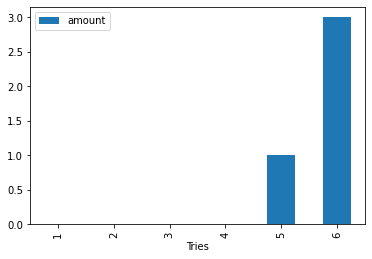

In [18]:
game.summary()

In [21]:
game.clear_statistics()

In [22]:
# Let's run summary() again
game.summary()

There are no statistics to print.


In [23]:
# My tests to make sure all the code runs
!pytest test_wordle.py

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-7.4.2, pluggy-1.3.0
rootdir: /home/jtakesuye/Final_Project
plugins: anyio-3.2.1
collected 3 items                                                              

test_wordle.py ...                                                       [100%]

============================== 3 passed in 0.77s ===============================


### Now it's your turn! I highly recommend running the code yourself to see what playing it is like. I promise it's more fun than just reading it.

Please note: I believe that due to the code's nature of a continous loop and inputs, sometimes when you input an answer it will exit you out of the cell and keep running, to which you just need to interrupt it and rerun the cell. Unfortunately a new game will be created so the word will be different if this happens.

In [28]:
# Uncomment the below code out.
# graders_wordle = Wordle()
# graders_wordle.new_game()

Ultimately, I worked very hard on this code and I believe that I should earn the extra credit for going above and beyond what was expected of me. I took it upon myself to build all the code for this from scratch (I didn't search up how to do it online), and went further than what I believe would have gotten me a good grade. 

I used a custom word bank containing 5000+ possible words to choose from and also confirm the users' word is real. I included a displayed keyboard to let the player know which letters worked and didn't work. I made my wordle in likeness of the real thing, with statistcs and graphs to show you how well you've played and your records. I used modules and techniques that weren't taught in the course, like using colorama to print in color and manipulating DataFrames for statistics. I even learned how to mock input multiple answers. This was especially difficult, and yet I used it to ensure my test file was 100% accurate and made it possible to simulate games as I've shown you.